In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
def generate_data(number_of_sample_entries):

 #initialize size
  data = np.ndarray((number_of_sample_entries,3))
  label = np.zeros((number_of_sample_entries,3))
  
  #class 1
  class_1 = number_of_sample_entries//3
  data[0:class_1, :] = np.random.uniform(low=1, high=5,size=(class_1,3))
  label[0:class_1, :] = np.array([1,0,0])
  #class 2
  class_2 = class_1 + number_of_sample_entries//3
  data[class_1:class_2, :] = np.random.uniform(low=10, high=15,size=(class_1,3))
  label[class_1:class_2, :] = np.array([0,1,0])
  #class 3
  class_3 = class_2 + number_of_sample_entries//3
  data[class_2:class_3, :] = np.random.uniform(low=20, high=25,size=(class_1,3))
  label[class_2:class_3, :] = np.array([0,0,1])

  #build it into datafram
  x = pd.DataFrame(data)
  labels = pd.DataFrame(label)
  #split data and shuffle data
  X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.3, shuffle=True)

  #return it to array
  label_train = y_train.to_numpy()
  data_train = X_train.to_numpy()
  label_test = y_test.to_numpy()
  data_test = X_test.to_numpy()


  return label_train,data_train,label_test,data_test

In [0]:
label_train,data_train,label_test,data_test = generate_data(6000)

In [0]:
def relu(X):
   return np.maximum(X,0)



def relu_derivative(x):
  return np.where(x>0, 1, 0)



def softmax(x):
  list_res=[]
  for i in range(len(x)):
    res = np.exp(x[i])/np.sum(np.exp(x[i]))
    list_res.append(res)
  return np.array(list_res)

In [0]:
# Initialize our neural network parameters.
params = {}
params['w_1'] = np.random.randn(3, 3)
params['b_1'] = np.zeros(3)

params['w_2'] = np.random.randn(3, 3)
params['b_2'] = np.zeros(3)

params['w_3'] = np.random.randn(3, 3)
params['b_3'] = np.zeros(3)

In [6]:
params

{'b_1': array([0., 0., 0.]),
 'b_2': array([0., 0., 0.]),
 'b_3': array([0., 0., 0.]),
 'w_1': array([[ 0.13095318,  0.08409127,  0.08453143],
        [-0.54589556,  0.16214619,  1.19208146],
        [-0.99722143, -0.20116152, -0.27684717]]),
 'w_2': array([[-0.26664542,  0.03836868, -1.66634156],
        [-0.31305133,  1.07765227,  1.14124247],
        [-1.14159903,  0.10028088,  1.69827081]]),
 'w_3': array([[ 0.20220617,  1.63474355, -1.73137934],
        [ 0.81286237, -0.64662802,  0.66244508],
        [ 0.00350068,  1.37333547, -0.75474401]])}

In [0]:
def backprop(I, t, params):
    N = I.shape[0]
    
    # Perform forwards computation.
    J_in = np.dot(I, params['w_1'].T)  + params['b_1']
    J_out = relu(J_in)
    K_in = np.dot(J_out,params['w_2'].T) + params['b_2']
    K_out = sigmoid(K_in)
    L_in = np.dot(K_out,params['w_3'])+params['b_3']
    L_out = softmax(L_in)

    loss = (1./N) * np.sum(-t * np.log(L_out) - (1 - t) * np.log(1 - L_out))
    
    # Perform backwards computation.
    loss_bar = 1
    L_out_bar = ((-t)/L_out) + ((1-t)/(1-L_out))
    L_in_bar = L_out_bar * softmax(L_in) * (1-softmax(L_in))
    w_3_bar = np.dot(K_out.T, L_in_bar)
    b_3_bar = np.dot(L_in_bar.T,np.ones(N))
    K_out_bar = np.dot(L_in_bar,params['w_3'].T)
    K_in_bar = K_out_bar * sigmoid(K_in) * (1-sigmoid(K_in))
    w_2_bar = np.dot(J_out.T , K_in_bar)
    b_2_bar = np.dot(K_in_bar.T,np.ones(N))
    J_out_bar = np.dot(K_in_bar , params['w_2'].T)
    
    J_in_bar = J_out_bar * relu_derivative(J_out)
    w_1_bar = np.dot(J_in_bar.T,I)
    b_1_bar = np.dot(J_in_bar.T,np.ones(N))



    grads = {}
    grads['w_3'] = w_3_bar 
    grads['b_3'] = b_3_bar
    grads['w_2'] = w_2_bar
    grads['b_2'] = b_2_bar
    grads['w_1'] = w_2_bar
    grads['b_1'] = b_2_bar


    return grads,loss

In [8]:
"""
alpha = 0.00002
cost_list=[]
iteration=0
loss=1
while loss>0.6:
    iteration+=1        
    grads, loss = backprop(data_train, label_train, params)
    for k in params:
        params[k] -= alpha * grads[k]
    cost_list.append(loss)
"""

'\nalpha = 0.00002\ncost_list=[]\niteration=0\nloss=1\nwhile loss>0.6:\n    iteration+=1        \n    grads, loss = backprop(data_train, label_train, params)\n    for k in params:\n        params[k] -= alpha * grads[k]\n    cost_list.append(loss)\n'

In [0]:
alpha = 0.00002
cost_list=[]
number_steps = 10000
for step in range(number_steps):      
    grads, loss = backprop(data_train, label_train, params)
    for k in params:
        params[k] -= alpha * grads[k]
    cost_list.append(loss)

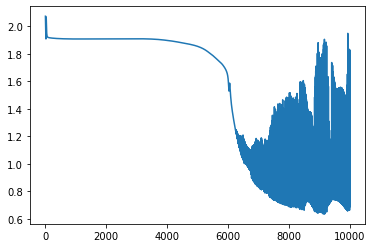

In [10]:
plt.plot(cost_list)
plt.show()

In [11]:
params

{'b_1': array([11.94692475,  0.44241461,  0.35109688]),
 'b_2': array([11.94692475,  0.44241461,  0.35109688]),
 'b_3': array([-2.69551367,  0.97924416,  1.71626951]),
 'w_1': array([[-0.15835763,  0.6173231 ,  0.48571954],
        [-1.84938517, -1.90766899,  3.20121433],
        [-0.99722143, -0.20116152, -0.27684717]]),
 'w_2': array([[-0.55595624,  0.57160051, -1.26515345],
        [-1.61654094, -0.9921629 ,  3.15037534],
        [-1.14159903,  0.10028088,  1.69827081]]),
 'w_3': array([[ 6.90761415,  0.49501025, -7.29705402],
        [ 0.12152897,  0.07805653,  0.62909393],
        [ 1.50893798,  0.29002243, -1.17686828]])}

In [0]:
def forward(I, params):
    N = I.shape[0]
    
    # Perform forwards computation.
    J_in = np.dot(I, params['w_1'].T)  + params['b_1']
    J_out = relu(J_in)
    K_in = np.dot(J_out,params['w_2'].T) + params['b_2']
    K_out = sigmoid(K_in)
    L_in = np.dot(K_out,params['w_3'])+params['b_3']
    L_out = softmax(L_in)
    return L_out

In [13]:
prediction = forward(data_test,params)
pred_df = pd.DataFrame(prediction,columns=['[d   a','   t   ','  a]'])
label_df = pd.DataFrame(label_test,columns=['[L  a','b  e','l  s]'])
result = pd.concat([pred_df,label_df],axis=1)
result.head(10)

,[d a,t,a],[L a,b e,l s]
0,0.289326,0.666513,0.044161,0.0,1.0,0.0
1,0.033265,0.556520,0.410214,0.0,1.0,0.0
2,0.008425,0.325983,0.665592,0.0,0.0,1.0
3,0.114386,0.722537,0.163077,0.0,1.0,0.0
4,0.008279,0.323463,0.668258,0.0,0.0,1.0
5,0.034964,0.565297,0.399739,0.0,1.0,0.0
6,0.932174,0.067759,0.000067,1.0,0.0,0.0
7,0.008214,0.322319,0.669467,0.0,0.0,1.0
8,0.931431,0.068499,0.000069,1.0,0.0,0.0
9,0.026399,0.515363,0.458238,0.0,1.0,0.0
